In [1]:
pd.set_option("display.max_columns", 200)

In [2]:
df_high = pd.read_csv('high.csv')
df_mid = pd.read_csv('mid.csv')
df_low = pd.read_csv('low.csv')
df_raku = pd.read_csv('raku.csv')

In [3]:
df = pd.concat([df_high, df_low, df_mid, df_raku], axis=0, ignore_index=True)

# Color

In [4]:
df['Color'] = df['Color'].str.lower()
df['Color'].value_counts()

white                                   264
clear                                   174
black                                    99
green                                    72
blue                                     54
red                                      39
brown                                    38
orange                                   37
turquoise                                32
amber                                    31
tan                                      26
yellow                                   22
purple                                   21
opaque white                             19
transparent clear                        15
iron red brown                           13
pink                                     12
bronze metallic                          11
clear transparent                        10
metallic bronze                           9
light green                               9
chartreuse                                9
translucent white               

In [5]:
df['Color'].replace(['opaque white', 'translucent white', 'off white'], 'white', inplace=True)
df['Color'].replace(['transparent clear', 'clear transparent', 'semi-opaque'], 'clear', inplace=True)

In [6]:
tmp = []
threshold = df.shape[0]/100
for i in range(df['Color'].nunique()):
    if df['Color'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Color'].value_counts(sort=False).index[i])
len(tmp)

383

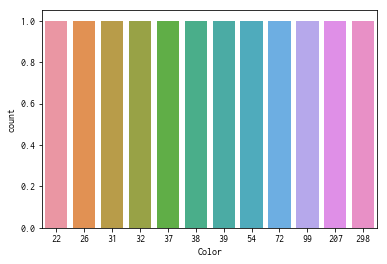

In [7]:
df['Color'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Color'].value_counts())

In [8]:
df['Color'].value_counts()

white        298
clear        207
black         99
green         72
blue          54
red           39
brown         38
orange        37
turquoise     32
amber         31
tan           26
yellow        22
Name: Color, dtype: int64

In [9]:
for ix in range(len(df)):
    if type(df['Color'][ix]) == float:
        df.drop(index=ix, inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df

,Glaze name,Cone,Color,Testing,Surface,Firing,Transparency,Recipe1,Recipe2,Recipe3,Recipe4,Recipe5,Recipe6,Recipe7,Recipe8,Recipe9,Recipe10,Recipe11,Recipe12,Recipe13,Recipe14
0,Blue lithium,010-09,blue,NaN,Semi-gloss,Ox. or Red.,Opaque,Flint\t40.40,Soda spar\t20.20,Cryolite\t15.20,Lithium carbonate\t10.10,Bone ash\t8.10,Kaolin\t3.00,Copper oxide\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Matt Strontium Crystal Magic Steven Hill,10,white,NaN,Satin matt,Reduction,Opaque,Custer feldspar\t46.00,Whiting\t17.30,Tile 6 clay\t14.90,Strontium carbonate\t12.60,Frit 3124\t4.60,Lithium carbonate\t4.60,Titanium dioxide\t13.80,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN
2,Alkaline High Fire 1,9-10,clear,NaN,Gloss,Ox. or Red.,Transparent,Feldspar\t62.50,Whiting\t7.70,EPK\t5.10,Flint\t24.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alkaline Lee Rexrode,9,white,NaN,Satin matt,Oxidation,Semi-opaque,Barium carbonate\t36.60,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alkaline Lee Rexrode Sr,9,white,NaN,Satin matt,Oxidation,Translucent,Strontium carbonate\t27.50,Lithium carbonate\t1.10,Nepheline syenite\t45.60,Ball clay\t7.20,Flint\t9.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Amber Barnard,10,amber,NaN,Gloss,Reduction,Transparent,Barnard clay\t33.00,Wollastonite\t13.00,Whiting\t15.00,Custer feldspar\t20.00,Gerstley borate\t3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amber Celadon McKenzie Smith,9-10,amber,NaN,Gloss,Reduction,Transparent,Wood ash\t22.00,Whiting\t17.00,Custer feldspar\t41.00,Ball clay\t4.00,Flint\t17.00,Red iron oxide\t8.00,Bentonite\t2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amber Celadon Nick's Ochre,10,amber,NaN,Gloss,Reduction,Transparent,Custer feldspar\t26.50,Whiting\t22.20,Flint\t25.60,Ball clay\t25.60,Yellow ochre\t8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Amber Celadon VC no albany,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t19.00,Gerstley borate\t3.00,Dolomite\t2.00,Wollastonite\t9.00,Whiting\t14.00,Redart\t29.00,Barnard clay\t10.00,EPK\t2.00,Flint\t10.00,Red iron oxide\t2.00,NaN,NaN,NaN,NaN
9,Amber Gulden's,10,amber,NaN,Gloss,Reduction,Translucent,Custer feldspar\t30.00,Whiting\t25.00,Flint\t25.00,Kentucky OM #4\t10.00,Gerstley borate\t3.00,Bentonite\t2.00,Yellow iron oxide\t7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Glaze name

In [12]:
df['Glaze name'] = df['Glaze name'].str.lower()
df['Glaze name'].value_counts()

white crackle phil's                          3
slip black                                    3
black matte                                   3
turquoise                                     3
clear                                         2
green mexico point                            2
aventurine circular dot                       2
black mirror                                  2
white fat                                     2
clear kitten's                                2
white waxy                                    2
aventurine ferro frit 2                       2
clear ian's  04                               2
satin oatmeal                                 2
clay casting porcelain slip michael corney    2
snow base shaffer var1                        2
white axner                                   2
ie 40                                         2
white matt                                    2
clear glaze                                   2
turquoise brilliant matt                

In [13]:
df.drop('Glaze name', axis=1, inplace=True)

# Cone

In [14]:
df['Cone'] = df['Cone'].str.lower()
df['Cone'].replace(['10 - 12', '10-12', '011'], '11', inplace=True)
df['Cone'].replace(['10 - 11', '10-11'], '10.5', inplace=True)
df['Cone'].replace(['9 - 11', '9-11', '9 - 10 - 11', '10?'], '10', inplace=True)
df['Cone'].replace(['9 - 10', '9-10', '010-09', '9-=10'], '9.5', inplace=True)
df['Cone'].replace(['8 - 10', '8-10', '8 - 9 - 10', '8 - 9 - 10', '9 only', '010 - 08'], '9', inplace=True)
df['Cone'].replace('8 - 9', '8.5', inplace=True)
df['Cone'].replace(['7 - 9', '08'], '8', inplace=True)
df['Cone'].replace(['7 - 8', '7-8'], '7.5', inplace=True)
df['Cone'].replace(['08 - 06', '6 - 8', '08-06', '6-8'], '7', inplace=True)
df['Cone'].replace(['6 - 7', '06 - 07', '07 - 06'], '6.5', inplace=True)
df['Cone'].replace(['06', '5-7', '5 - 7'], '6', inplace=True)
df['Cone'].replace(['5 - 6', '5-6', 'cone 5-6'], '5.5', inplace=True)
df['Cone'].replace(['05', '06-04', '4 - 6', '06 - 04'], '5', inplace=True)
df['Cone'].replace(['4 - 5', '05 - 04'], '4.5', inplace=True)
df['Cone'].replace(['04', '05-03', '3 - 5'], '4', inplace=True)
df['Cone'].replace(['04-03', '04 - 03', '03 - 04'], '3.5', inplace=True)
df['Cone'].replace(['03', '2-4', '04-02', '03?'], '3', inplace=True)
df['Cone'].replace(['03-02'], '2.5', inplace=True)
df['Cone'].replace(['02', '1-3'], '2', inplace=True)
df['Cone'].replace(['02-01'], '1.5', inplace=True)
df['Cone'].replace(['01'], '1', inplace=True)

df['Cone'].replace(['3 - 6', '014', '08-04', '06-03', '5 - 8', '6 - 11', '04-11', '2 - 6', '04-9', '04-01', '5 - 9', '4 - 5 - 6 - 7 - 8', '06-01', '4 - 7', '08 - 04', '06 - 03', '2 - 5', '6 - 10', '6-10', '7 - 10', '9 - 12', '6 - 9', '5-9', '04 - 12', '5 - 10', '5-10', '6, 7, 8, 9, 10'], np.NaN, inplace=True)
df['Cone'].value_counts()

6       177
10      154
4       135
9.5      83
3.5      76
5.5      68
5        62
9        55
3        28
7        17
6.5      10
8         9
10.5      9
2         8
1         6
11        3
4.5       2
1.5       1
2.5       1
Name: Cone, dtype: int64

In [15]:
df = pd.concat([df, pd.get_dummies(df['Cone'], prefix='Cone_', dummy_na=True)], axis=1)
df = df.drop('Cone', axis=1)

# Testing

In [16]:
df['Testing'] = df['Testing'].str.lower()
df['Testing'].value_counts()

untested    294
tested       69
Name: Testing, dtype: int64

In [17]:
df.drop('Testing', axis=1, inplace=True)

# Surface

In [18]:
df['Surface'] = df['Surface'].str.lower()
df['Surface'].value_counts()

gloss                                254
satin matt                           112
unglazed                              72
matt                                  60
glossy                                45
waxy                                  35
semi-gloss                            30
matte                                 28
satin matte                           14
glossy or shiny                       12
?                                     11
shiny or glossy                       11
glossy shiny                          10
shiny glossy                          10
satin                                  9
lichen                                 7
shiny, glossy                          6
semi-matte or satin                    6
glossy, shiny                          5
crawl                                  5
shiny                                  5
slip or engobe                         5
texture                                4
semi matt                              4
metallic        

In [19]:
df.drop('Surface', axis=1, inplace=True)

# Firing

In [20]:
df['Firing'] = df['Firing'].str.lower()
df['Firing'].value_counts()

oxidation               455
ox. or red.             193
reduction               145
ox or red                23
raku                     16
salt - soda              12
wood                      5
soda                      4
ox. or red. or soda       2
oxidation, reduction      2
oxidaition                1
salt                      1
ox                        1
Name: Firing, dtype: int64

In [21]:
df['Firing'].replace(['ox or red', 'oxidation, reduction'], 'ox. or red.', inplace=True)
df['Firing'].replace(['salt', 'soda'], 'salt - soda', inplace=True)
df['Firing'].replace(['oxidaition', 'ox'], 'oxidation', inplace=True)
df['Firing'].replace('reduction o', 'repruction', inplace=True)
df['Firing'].value_counts()

oxidation              457
ox. or red.            218
reduction              145
salt - soda             17
raku                    16
wood                     5
ox. or red. or soda      2
Name: Firing, dtype: int64

In [22]:
df['Firing'] = df['Firing'].str.lower()
tmp = []
threshold = df.shape[0]/100
for i in range(df['Firing'].nunique()):
    if df['Firing'].value_counts(sort=False)[i] < threshold:
        tmp.append(df['Firing'].value_counts(sort=False).index[i])
len(tmp)

2

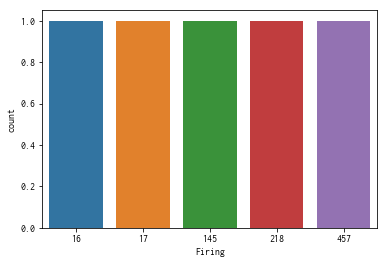

In [23]:
df['Firing'].replace(tmp, np.NaN, inplace=True)
sns.countplot(df['Firing'].value_counts())

In [24]:
df['Firing'].value_counts()

oxidation      457
ox. or red.    218
reduction      145
salt - soda     17
raku            16
Name: Firing, dtype: int64

In [25]:
df = pd.concat([df, pd.get_dummies(df['Firing'], prefix='Firing_', dummy_na=True)], axis=1)
df = df.drop('Firing', axis=1)

# Transparency

In [26]:
df['Transparency'] = df['Transparency'].str.lower()
df['Transparency'].value_counts()

opaque         327
transparent    184
translucent     76
semi-opaque     58
Name: Transparency, dtype: int64

In [27]:
df.drop('Transparency', axis=1, inplace=True)

# Recipe

In [28]:
recipe = []

In [29]:
ingredients = []
for col in df.columns:
    if col.startswith('Recipe'):
        for ix in range(df.shape[0]):
            ingredients.append(str(df[col][ix]).split('\t')[0:2])
df_ingredients = pd.DataFrame(ingredients)
df_ingredients.columns = ['ingredient', 'amount']

In [30]:
df_ingredients['amount'] = df_ingredients['amount'].astype('float64')

In [31]:
df_ingredients

,ingredient,amount
0,Flint,40.4
1,Custer feldspar,46.0
2,Feldspar,62.5
3,Barium carbonate,36.6
4,Strontium carbonate,27.5
5,Barnard clay,33.0
6,Wood ash,22.0
7,Custer feldspar,26.5
8,Custer feldspar,19.0
9,Custer feldspar,30.0


In [32]:
df_ingredients['ingredient'] = df_ingredients['ingredient'].str.lower()
len(df_ingredients['ingredient'].unique())

281

In [33]:
for ingredient in df_ingredients['ingredient'].unique():
    df[ingredient] = np.NaN

In [34]:
for iing in range(int(len(df_ingredients)/len(df))):
    for ix in range(len(df)):
        ingredient = df_ingredients['ingredient'][len(df)*iing + ix]
        amount = df_ingredients['amount'][len(df)*iing + ix]
        df[ingredient][ix] = amount

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
for col in df.columns:
    if col.startswith('Recipe'):
        df.drop(str(col), axis=1, inplace=True)

In [36]:
df

,Color,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",ball clay,kaolin - theoretical,redart,feldspar fff,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,lithium carbonate,...,spodumene - theoretical,pyrax,pioneer kaolin,yellow ochre,ulrox,ferro frit 3195,tennessee #5 ball clay,grolleg kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,rice hull ash,nsd,zircopax plus,titanium dioxide,black stain,talc (milled white),lead carbonate,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,zinc,praseodymium,spodumene - australian,borax28.60,gerstley borate28.60,ultrox,burnt umber,nickel oxide,silica (325m),red copper oxide,chrome oxide,iron oxide,epsom salts,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,fluorspar,pioneer talc,naples stain,cmc,gerstley borate14.30,whiting28.60,chromium oxide,mason stain 6600,barium carb,cedar heights redart clay,keystone spar,ochre,sodium silicate,molochite,kyanite,iron chromate,cobalt stain,copper oxide red,sand,ball clay bell dark,uranium oxide,epson salts,copper carbonate7.10,copper carbonate4.30,mount st. helens volcanic ash,potterycrafts frit p2960,nickel carbonate,opax,"silica, 325 mesh",volcanic ash - mt. st. helens,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,mullite,talc (ny),ky white glaze clay,glomax,v-gum t,fine grog,lincoln fire clay,stayflo liquid starch 1,granular ilmenite,darvan 7,granular manganese,black mason stain,rutile (granular),cerdec intensive red stain,nylon fiber,manganese dioxide (milled),burnt sienna,ferric oxide,red iron ox,silica sand,lithium carb
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,46.00,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [37]:
df.drop('nan', axis=1, inplace=True)

In [38]:
df

,Color,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",ball clay,kaolin - theoretical,redart,feldspar fff,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,lithium carbonate,...,spodumene - theoretical,pyrax,pioneer kaolin,yellow ochre,ulrox,ferro frit 3195,tennessee #5 ball clay,grolleg kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,rice hull ash,nsd,zircopax plus,titanium dioxide,black stain,talc (milled white),lead carbonate,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,zinc,praseodymium,spodumene - australian,borax28.60,gerstley borate28.60,ultrox,burnt umber,nickel oxide,silica (325m),red copper oxide,chrome oxide,iron oxide,epsom salts,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,fluorspar,pioneer talc,naples stain,cmc,gerstley borate14.30,whiting28.60,chromium oxide,mason stain 6600,barium carb,cedar heights redart clay,keystone spar,ochre,sodium silicate,molochite,kyanite,iron chromate,cobalt stain,copper oxide red,sand,ball clay bell dark,uranium oxide,epson salts,copper carbonate7.10,copper carbonate4.30,mount st. helens volcanic ash,potterycrafts frit p2960,nickel carbonate,opax,"silica, 325 mesh",volcanic ash - mt. st. helens,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,mullite,talc (ny),ky white glaze clay,glomax,v-gum t,fine grog,lincoln fire clay,stayflo liquid starch 1,granular ilmenite,darvan 7,granular manganese,black mason stain,rutile (granular),cerdec intensive red stain,nylon fiber,manganese dioxide (milled),burnt sienna,ferric oxide,red iron ox,silica sand,lithium carb
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,46.00,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

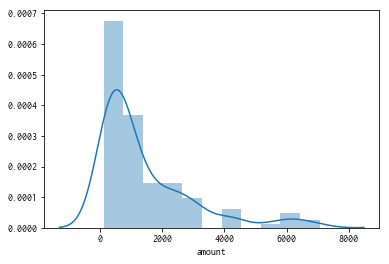

In [39]:
tmp = df_ingredients['amount'][pd.notna(df_ingredients['amount'])]
sns.distplot(tmp[tmp>100])

In [40]:
tmp[tmp>100]

112     2500.0
113     2500.0
270      778.4
362      464.0
461      174.8
469      174.8
485     2080.0
486     5883.0
488     7059.0
489     2640.0
490     2000.0
515     6611.0
696     4357.0
700     4000.0
758      150.0
797     1200.0
840     1040.0
861     3200.0
885     2800.0
896     3200.0
907     4301.0
939      400.0
940      400.0
941      842.0
1067    2500.0
1068    2500.0
1225     603.0
1317     576.0
1440    1600.0
1441     470.0
         ...  
4516     554.0
4520    3000.0
4617     800.0
4660    3200.0
4681     800.0
4716     160.0
4727     430.0
4760     400.0
5260     800.0
5261     157.0
5264    2160.0
5475    3200.0
5615    1760.0
5636    1280.0
5671     800.0
5682     172.0
5714     240.0
5715     240.0
6216     157.0
6430     140.0
6570     240.0
6626     320.0
6637     860.0
6669     160.0
7525     160.0
7581    1600.0
7592     258.0
7624     160.0
8547     172.0
9502     430.0
Name: amount, Length: 129, dtype: float64

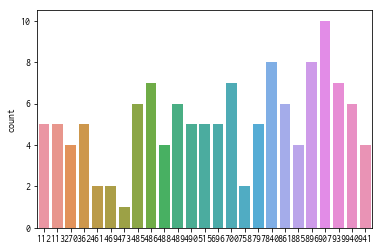

In [41]:
sns.countplot(tmp[tmp>100].index%df.shape[0])

In [42]:
del_ix = tmp[tmp>100].index%df.shape[0]

In [43]:
del_ix

Int64Index([112, 113, 270, 362, 461, 469, 485, 486, 488, 489,
            ...
            840, 896, 907, 939, 840, 896, 907, 939, 907, 907],
           dtype='int64', length=129)

In [44]:
df.drop(index=del_ix, inplace=True)
df.reset_index(drop=True, inplace=True)

In [45]:
df

,Color,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",ball clay,kaolin - theoretical,redart,feldspar fff,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,lithium carbonate,...,spodumene - theoretical,pyrax,pioneer kaolin,yellow ochre,ulrox,ferro frit 3195,tennessee #5 ball clay,grolleg kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,rice hull ash,nsd,zircopax plus,titanium dioxide,black stain,talc (milled white),lead carbonate,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,zinc,praseodymium,spodumene - australian,borax28.60,gerstley borate28.60,ultrox,burnt umber,nickel oxide,silica (325m),red copper oxide,chrome oxide,iron oxide,epsom salts,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,fluorspar,pioneer talc,naples stain,cmc,gerstley borate14.30,whiting28.60,chromium oxide,mason stain 6600,barium carb,cedar heights redart clay,keystone spar,ochre,sodium silicate,molochite,kyanite,iron chromate,cobalt stain,copper oxide red,sand,ball clay bell dark,uranium oxide,epson salts,copper carbonate7.10,copper carbonate4.30,mount st. helens volcanic ash,potterycrafts frit p2960,nickel carbonate,opax,"silica, 325 mesh",volcanic ash - mt. st. helens,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,mullite,talc (ny),ky white glaze clay,glomax,v-gum t,fine grog,lincoln fire clay,stayflo liquid starch 1,granular ilmenite,darvan 7,granular manganese,black mason stain,rutile (granular),cerdec intensive red stain,nylon fiber,manganese dioxide (milled),burnt sienna,ferric oxide,red iron ox,silica sand,lithium carb
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,46.00,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [46]:
df_ingredients['ingredient'].str.lower().value_counts()

nan                            7525
epk                             430
whiting                         401
flint                           380
silica                          257
gerstley borate                 254
nepheline syenite               240
bentonite                       226
custer feldspar                 206
dolomite                        182
zinc oxide                      138
ball clay                       131
barium carbonate                125
kaolin                          122
red iron oxide                  119
talc                            117
copper carbonate                117
lithium carbonate               103
zircopax                        100
frit 3124                        99
tin oxide                        75
wollastonite                     72
frit 3134                        70
kentucky om #4                   69
strontium carbonate              64
kona f-4 feldspar                62
cobalt carbonate                 54
spodumene                   

In [47]:
tmp = []
threshold = df.shape[0]/100
for i in range(df_ingredients['ingredient'].nunique()):
    if df_ingredients['ingredient'].value_counts(sort=False)[i] < threshold:
        tmp.append(df_ingredients['ingredient'].value_counts(sort=False).index[i])
len(tmp)

212

In [48]:
tmp.sort()

In [49]:
tmp

['#6 tile clay',
 '3191',
 'albany slip clay',
 'alberta slip',
 'alumina',
 'alumina hydrate',
 'amblygonite',
 'ash wood',
 'avery kaolin',
 'ball clay bell dark',
 'barium carb',
 'barium sulfate',
 'barnard slip',
 'bell dark ball clay',
 'black iron oxide',
 'black mason stain',
 'black nickel oxide',
 'black stain',
 'borax14.30',
 'borax28.60',
 'boric acid',
 'burnt sienna',
 'burnt umber',
 'c & c',
 'calcium carbonate',
 'calvert clay',
 'carbondale red',
 'cedar heights redart',
 'cedar heights redart clay',
 'cerdec intensive red stain',
 'china clay',
 'chromium oxide',
 'clay',
 'cmc',
 'cobalt oxide, black',
 'cobalt stain',
 'copper carbonate4.30',
 'copper carbonate7.10',
 'copper oxide',
 'copper oxide red',
 'cryolite',
 'cullet (container glass)',
 'darvan',
 'darvan 7',
 'epk kaolin',
 'epsom salts',
 'epson salts',
 'f-4 feldspar',
 'f-4 spar',
 'feldspar - theoretical',
 'feldspar fff',
 'ferric oxide',
 'ferro frit 3110',
 'ferro frit 3195',
 'ferro frit 3269',


# modeling

In [50]:
df

,Color,Cone__1,Cone__1.5,Cone__10,Cone__10.5,Cone__11,Cone__2,Cone__2.5,Cone__3,Cone__3.5,Cone__4,Cone__4.5,Cone__5,Cone__5.5,Cone__6,Cone__6.5,Cone__7,Cone__8,Cone__9,Cone__9.5,Cone__nan,Firing__ox. or red.,Firing__oxidation,Firing__raku,Firing__reduction,Firing__salt - soda,Firing__nan,flint,custer feldspar,feldspar,barium carbonate,strontium carbonate,barnard clay,wood ash,feldspar - theoretical,albany slip,alberta slip,epk,nepheline syenite,hardwood ash,custer spar,mixed hardwood ash,kentucky om #4,avery kaolin,frit 3110,kona f-4 feldspar,cornwall stone,dolomite,g-200 feldspar,minspar soda feldspar,talc,g-200 spar,potash feldspar,kona f-4 spar,whiting,k-200 feldspar,gerstley borate,kaolin,silica,tile 6 clay,goldart,grolleg,a.p. green,foundry hill creme,#6 tile clay,xx sagger,hawthorne bond,kona feldspar,kingman feldspar,soda feldspar,ferro frit 3269,zinc oxide,potash feldspar - theoretical,ferro frit 3110,red clay,bone ash,neph sy,gillespie borate,soda ash,"grog,150 mesh",ball clay,kaolin - theoretical,redart,feldspar fff,g22,frit 3134,plastic vitrox,kona f-4 spar,f-4 feldspar,nc-4 feldspar,frit 3195,frit 5301,frit p-25,frit 3124,frit 3819,frit 3269,borax,ferro frit 3124,spodumene,lithium carbonate,...,spodumene - theoretical,pyrax,pioneer kaolin,yellow ochre,ulrox,ferro frit 3195,tennessee #5 ball clay,grolleg kaolin,superpax,darvan,pyrotrol,flint (silica),kona f-4 soda feldspar,rice hull ash,nsd,zircopax plus,titanium dioxide,black stain,talc (milled white),lead carbonate,zirconium silicate,grog,calvert clay,"grog, fine",neuman red,zinc,praseodymium,spodumene - australian,borax28.60,gerstley borate28.60,ultrox,burnt umber,nickel oxide,silica (325m),red copper oxide,chrome oxide,iron oxide,epsom salts,kaopaque,tin,clay,rhyolite,black iron oxide,manganese carbonate,fluorspar,pioneer talc,naples stain,cmc,gerstley borate14.30,whiting28.60,chromium oxide,mason stain 6600,barium carb,cedar heights redart clay,keystone spar,ochre,sodium silicate,molochite,kyanite,iron chromate,cobalt stain,copper oxide red,sand,ball clay bell dark,uranium oxide,epson salts,copper carbonate7.10,copper carbonate4.30,mount st. helens volcanic ash,potterycrafts frit p2960,nickel carbonate,opax,"silica, 325 mesh",volcanic ash - mt. st. helens,copper oxide,yellow iron oxide,green chrome oxide,rutile (powdered),black nickel oxide,mullite,talc (ny),ky white glaze clay,glomax,v-gum t,fine grog,lincoln fire clay,stayflo liquid starch 1,granular ilmenite,darvan 7,granular manganese,black mason stain,rutile (granular),cerdec intensive red stain,nylon fiber,manganese dioxide (milled),burnt sienna,ferric oxide,red iron ox,silica sand,lithium carb
0,blue,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,40.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,white,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,46.00,NaN,NaN,12.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.3,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,4.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [51]:
X = df.drop('Color', axis=1)
y = df['Color']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [53]:
import lightgbm
#from sklearn.linear_model import LogisticRegression

clf = lightgbm.LGBMClassifier()
#clf = LogisticRegression()

clf.fit(X_train, y_train)
predict = clf.predict(X_test)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
df_check = pd.DataFrame(predict, np.array(y_test))
df_check

,0
green,turquoise
blue,blue
orange,orange
orange,orange
green,green
black,black
white,white
orange,clear
clear,clear
clear,clear


In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-pac

In [57]:
feature_importance = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['feature_importance'])
feature_importance.sort_values(by=['feature_importance'], ascending=False)

,feature_importance
whiting,3518
epk,3475
flint,2862
silica,2054
gerstley borate,1968
nepheline syenite,1702
Firing__oxidation,1470
custer feldspar,1327
bentonite,875
red iron oxide,868


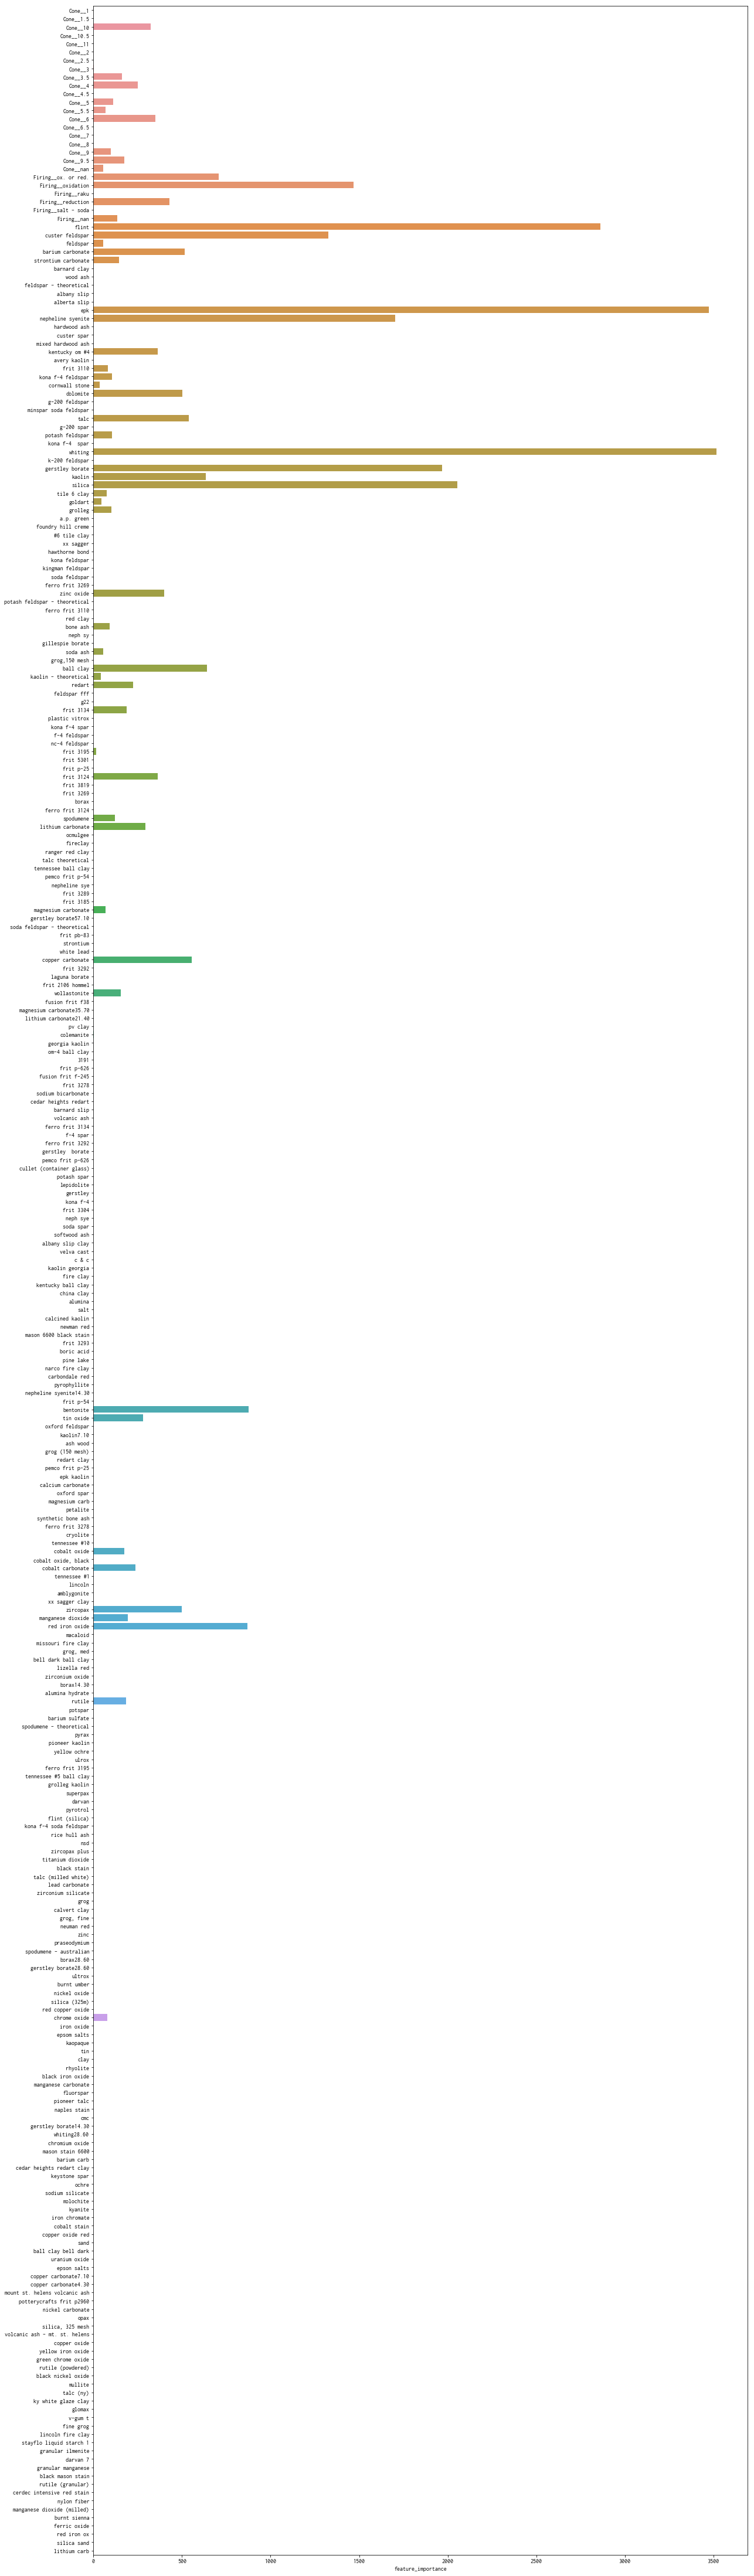

In [58]:
plt.figure(figsize=(20, 80))
sns.barplot(x=feature_importance['feature_importance'], y=feature_importance.index)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

             precision    recall  f1-score   support

      amber       0.50      0.20      0.29         5
      black       0.67      0.76      0.71        21
       blue       0.54      0.50      0.52        14
      brown       0.60      0.55      0.57        11
      clear       0.65      0.62      0.63        53
      green       0.67      0.62      0.65        16
     orange       0.78      0.58      0.67        12
        red       0.50      0.38      0.43         8
        tan       0.00      0.00      0.00         3
  turquoise       0.88      0.58      0.70        12
      white       0.64      0.84      0.72        69
     yellow       0.00      0.00      0.00         9

avg / total       0.62      0.64      0.62       233



In [56]:
scores

array([0.45026178, 0.5978836 , 0.61621622, 0.62295082, 0.54395604])